# Example of the aitlas toolbox in the context of object detection in remote sensing images


## Import the required packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionPascalDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects witn bounding boxes

Total number of patches: 10943


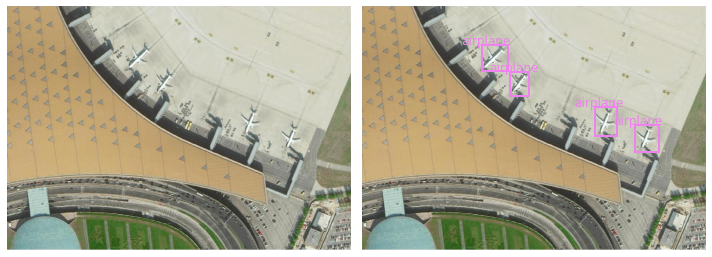

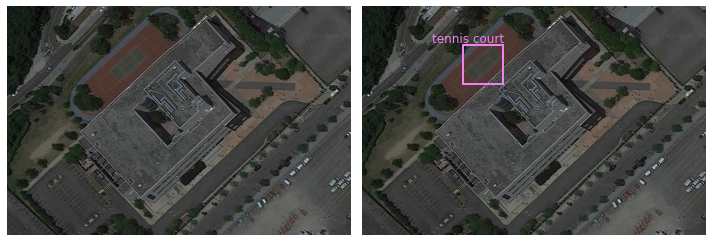

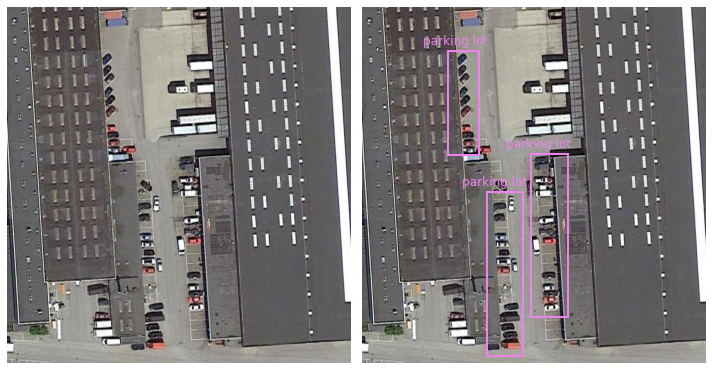

In [3]:
dataset_config = {
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/test.txt"
}
dataset = ObjectDetectionPascalDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(5);
dataset.show_image(800);
dataset.show_image(2458);

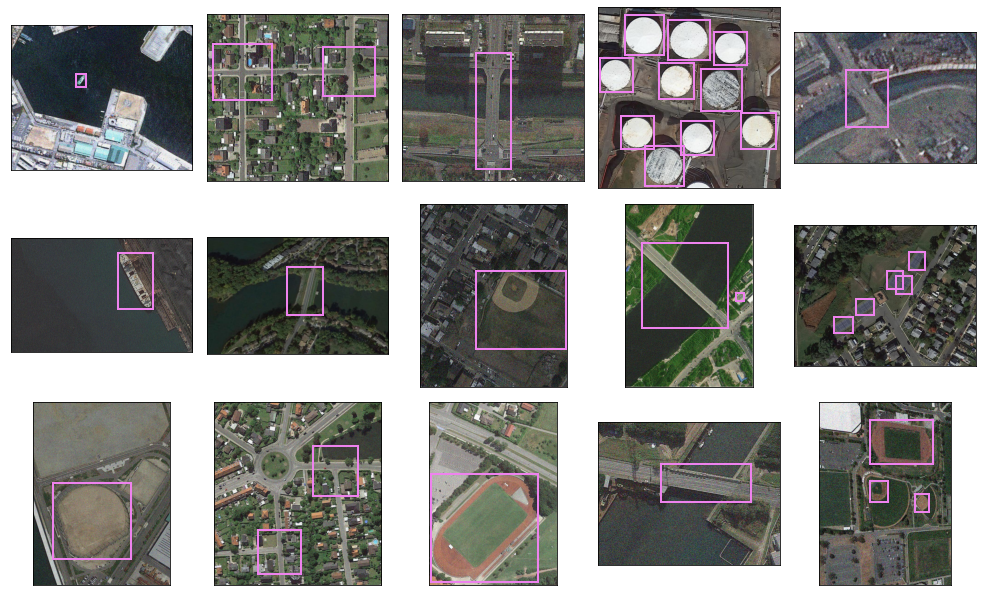

In [8]:
dataset.show_batch(15);

In [4]:
dataset.data_distribution_table()

Label  Count
0           T junction   2475
1             airplane   2452
2     baseball diamond   2032
3     basketball court   2249
4               bridge   2408
5            crossroad   2659
6   ground track field   2281
7               harbor   1985
8          parking lot   2480
9                 ship   2078
10        storage tank   2232
11        tennis court   2322
12             vehicle   2390

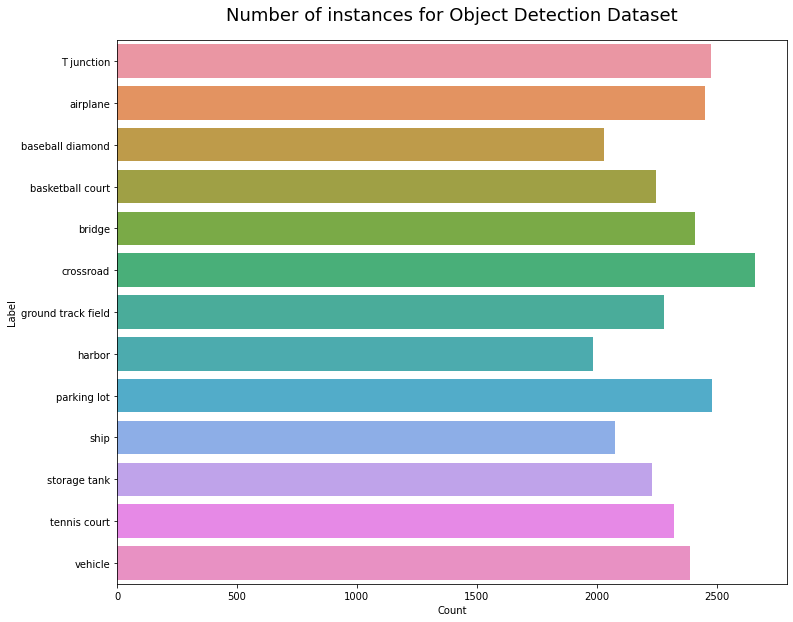

In [5]:
dataset.data_distribution_barchart();

## Load train data

In [9]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/train.txt",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionPascalDataset(train_dataset_config)

validation_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/val.txt",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
validation_dataset = ObjectDetectionPascalDataset(validation_dataset_config)

print(f"Total number of train images: {len(train_dataset)}, Total number of validation images: {len(validation_dataset)}")

Total number of train images: 5401, Total number of validation images: 5417


## Create the model

In [10]:
epochs = 20
model_directory = "./experiments/hrrsd"
model_config = {
    "num_classes": 14,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [11]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    val_dataset=validation_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2022-12-07 12:18:56,610 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████| 338/338 [03:39<00:00,  1.54it/s]
2022-12-07 12:22:35,929 INFO epoch: 1, time: 219, loss:  0.37531
testing on train set: 100%|███████████████████████████████████████████████████████████| 338/338 [01:51<00:00,  3.04it/s]
2022-12-07 12:25:48,945 INFO map:0.7768400311470032, map_50:0.7768400311470032, map_75:-1.0, map_small:0.5680015087127686, map_medium:0.6934115886688232, map_large:0.7720919251441956, mar_1:0.405642569065094, mar_10:0.8381054997444153, mar_100:0.8758324384689331, mar_small:0.7203971147537231, mar_medium:0.8128992319107056, mar_large:0.8865373134613037, map_per_class:tensor(0.3421), tensor(0.9835), tensor(0.7863), tensor(0.2849), tensor(0.8250), tensor(0.8337), tensor(0.9154), tensor(0.9047), tensor(0.6050), tensor(0.9082), tensor(0.9687), tensor(0.8433), tensor(0.8981), mar_100_per_class:tensor(0.5570), tensor(0.9911), tensor(0.9227), te

training: 100%|███████████████████████████████████████████████████████████████████████| 338/338 [03:39<00:00,  1.54it/s]
2022-12-07 12:52:09,903 INFO epoch: 4, time: 219, loss:  0.15365
testing on train set: 100%|███████████████████████████████████████████████████████████| 338/338 [01:54<00:00,  2.95it/s]
2022-12-07 12:55:14,259 INFO map:0.9554200768470764, map_50:0.9554200768470764, map_75:-1.0, map_small:0.805915117263794, map_medium:0.8922272324562073, map_large:0.9404535293579102, mar_1:0.4544985592365265, mar_10:0.9435818195343018, mar_100:0.9819924235343933, mar_small:0.8716023564338684, mar_medium:0.9699866771697998, mar_large:0.9782441258430481, map_per_class:tensor(0.7294), tensor(0.9998), tensor(0.9767), tensor(0.9298), tensor(0.9672), tensor(0.9799), tensor(0.9849), tensor(0.9882), tensor(0.9483), tensor(0.9814), tensor(0.9859), tensor(0.9674), tensor(0.9816), mar_100_per_class:tensor(0.9158), tensor(1.), tensor(0.9901), tensor(0.9603), tensor(0.9775), tensor(0.9901), tensor

testing on validation set: 100%|██████████████████████████████████████████████████████| 339/339 [01:50<00:00,  3.06it/s]
2022-12-07 13:27:19,237 INFO map:0.8326989412307739, map_50:0.8326989412307739, map_75:-1.0, map_small:0.6605605483055115, map_medium:0.702219545841217, map_large:0.8485831618309021, mar_1:0.4234311282634735, mar_10:0.8501584529876709, mar_100:0.8870938420295715, mar_small:0.7449626922607422, mar_medium:0.7962465286254883, mar_large:0.9123473763465881, map_per_class:tensor(0.7139), tensor(0.9478), tensor(0.8540), tensor(0.6155), tensor(0.8386), tensor(0.7589), tensor(0.9411), tensor(0.8948), tensor(0.5748), tensor(0.8947), tensor(0.9593), tensor(0.9422), tensor(0.8895), mar_100_per_class:tensor(0.8573), tensor(0.9523), tensor(0.9171), tensor(0.6923), tensor(0.8771), tensor(0.7937), tensor(0.9522), tensor(0.9286), tensor(0.7939), tensor(0.9134), tensor(0.9790), tensor(0.9594), tensor(0.9160)
2022-12-07 13:27:19,243 INFO INFO: Early stopping counter 2 of 10
training: 1

training: 100%|███████████████████████████████████████████████████████████████████████| 338/338 [03:44<00:00,  1.50it/s]
2022-12-07 13:59:33,536 INFO epoch: 11, time: 225, loss:  0.07710
testing on train set: 100%|███████████████████████████████████████████████████████████| 338/338 [01:50<00:00,  3.05it/s]
2022-12-07 14:02:25,849 INFO map:0.9917694926261902, map_50:0.9917694926261902, map_75:-1.0, map_small:0.9622558951377869, map_medium:0.9689667224884033, map_large:0.9838330149650574, mar_1:0.4640466570854187, mar_10:0.9575597047805786, mar_100:0.9962689876556396, mar_small:0.9965558052062988, mar_medium:0.9994606375694275, mar_large:0.9951658248901367, map_per_class:tensor(0.9785), tensor(1.), tensor(0.9901), tensor(0.9891), tensor(0.9802), tensor(0.9901), tensor(1.0000), tensor(1.0000), tensor(0.9899), tensor(0.9862), tensor(0.9993), tensor(0.9996), tensor(0.9900), mar_100_per_class:tensor(0.9825), tensor(1.), tensor(0.9970), tensor(0.9919), tensor(0.9879), tensor(0.9990), tensor(1

testing on train set: 100%|███████████████████████████████████████████████████████████| 338/338 [01:50<00:00,  3.05it/s]
2022-12-07 14:58:34,298 INFO map:0.9931206703186035, map_50:0.9931206703186035, map_75:-1.0, map_small:0.9859411120414734, map_medium:0.9735496044158936, map_large:0.9846433997154236, mar_1:0.4646066427230835, mar_10:0.9584841132164001, mar_100:0.9969452619552612, mar_small:0.9971427917480469, mar_medium:0.9993467330932617, mar_large:0.9955058693885803, map_per_class:tensor(0.9802), tensor(1.), tensor(0.9901), tensor(0.9901), tensor(0.9901), tensor(0.9901), tensor(1.0000), tensor(1.), tensor(0.9802), tensor(0.9901), tensor(0.9999), tensor(1.), tensor(0.9999), mar_100_per_class:tensor(0.9877), tensor(1.), tensor(0.9990), tensor(0.9929), tensor(0.9948), tensor(0.9990), tensor(1.), tensor(1.), tensor(0.9879), tensor(0.9990), tensor(1.), tensor(1.), tensor(1.)
testing on validation set: 100%|██████████████████████████████████████████████████████| 339/339 [01:52<00:00,  3

testing on validation set: 100%|██████████████████████████████████████████████████████| 339/339 [01:54<00:00,  2.97it/s]
2022-12-07 15:30:19,188 INFO map:0.8443852663040161, map_50:0.8443852663040161, map_75:-1.0, map_small:0.7072805762290955, map_medium:0.7196219563484192, map_large:0.8597069382667542, mar_1:0.42659223079681396, mar_10:0.8401599526405334, mar_100:0.87734055519104, mar_small:0.7468292117118835, mar_medium:0.7959721684455872, mar_large:0.8989880681037903, map_per_class:tensor(0.7309), tensor(0.9692), tensor(0.8508), tensor(0.6045), tensor(0.8435), tensor(0.8322), tensor(0.9531), tensor(0.9164), tensor(0.5994), tensor(0.8971), tensor(0.9596), tensor(0.9267), tensor(0.8936), mar_100_per_class:tensor(0.8062), tensor(0.9704), tensor(0.8911), tensor(0.6394), tensor(0.8679), tensor(0.8642), tensor(0.9673), tensor(0.9318), tensor(0.7162), tensor(0.9176), tensor(0.9781), tensor(0.9357), tensor(0.9194)
2022-12-07 15:30:19,193 INFO INFO: Early stopping counter 2 of 10
2022-12-07 

## Evalute the model using test data

In [15]:
test_dataset_config = {
    "shuffle": False,
    "image_dir": "../data/HRRSD/JPEGImages/",
    "annotations_dir": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/Annotations/",
    "imageset_file": "../data/HRRSD/TGRS-HRRSD-Dataset/OPT2017/ImageSets/Main/test.txt",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]

}

test_dataset = ObjectDetectionPascalDataset(test_dataset_config)
print(f"Total number of test images: {len(test_dataset)}")

model = FasterRCNN(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Total number of test images: 10943


2022-12-07 11:52:50,109 INFO Loading checkpoint ./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar
2022-12-07 11:52:50,443 INFO Loaded checkpoint ./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar at epoch 18
testing on test set: 100%|████████████████████████████████████████████████████████████| 171/171 [03:50<00:00,  1.35s/it]


[{'map': 0.8143315315246582,
  'map_50': 0.8143315315246582,
  'map_75': -1.0,
  'map_small': 0.5168812274932861,
  'map_medium': 0.7217122316360474,
  'map_large': 0.8405283689498901,
  'mar_1': 0.41289928555488586,
  'mar_10': 0.8232029676437378,
  'mar_100': 0.8528896570205688,
  'mar_small': 0.6047058701515198,
  'mar_medium': 0.7990776896476746,
  'mar_large': 0.891102135181427,
  'map_per_class': [tensor(0.6683),
   tensor(0.9686),
   tensor(0.7975),
   tensor(0.5925),
   tensor(0.8222),
   tensor(0.7706),
   tensor(0.9562),
   tensor(0.8896),
   tensor(0.5380),
   tensor(0.8661),
   tensor(0.9356),
   tensor(0.8797),
   tensor(0.9014)],
  'mar_100_per_class': [tensor(0.7911),
   tensor(0.9755),
   tensor(0.8563),
   tensor(0.6274),
   tensor(0.8463),
   tensor(0.7864),
   tensor(0.9632),
   tensor(0.9254),
   tensor(0.6613),
   tensor(0.8874),
   tensor(0.9561),
   tensor(0.8906),
   tensor(0.9205)]}]

## Predictions

2022-12-07 12:18:11,535 INFO Loading checkpoint ./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar
2022-12-07 12:18:11,832 INFO Loaded checkpoint ./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar at epoch 18


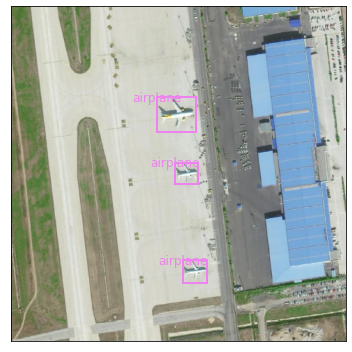

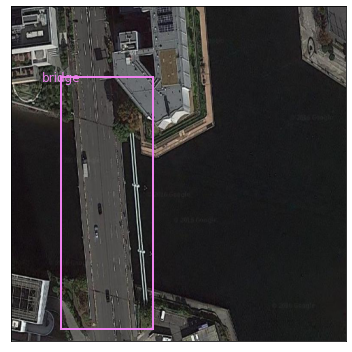

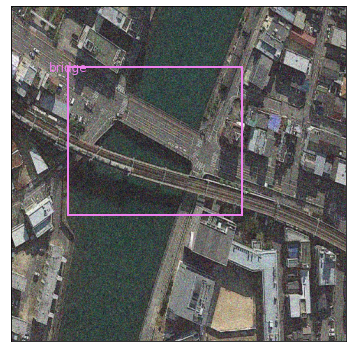

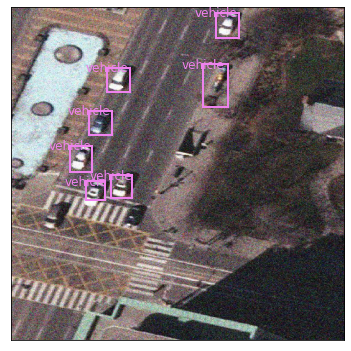

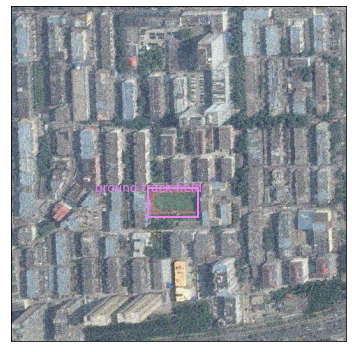

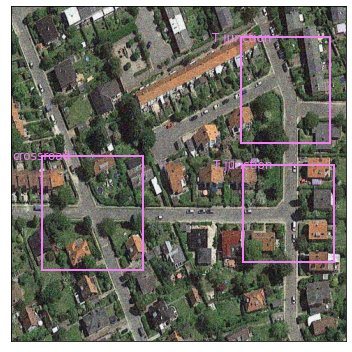

In [7]:
model_config = {
    "num_classes": 14,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}
model = FasterRCNN(model_config)
model.prepare()

model_path = "./experiments/hrrsd-10-4/best_checkpoint_1670264252_17.pth.tar"
labels = [None,
         'T junction',
         'airplane',
         'baseball diamond',
         'basketball court',
         'bridge',
         'crossroad',
         'ground track field',
         'harbor',
         'parking lot',
         'ship',
         'storage tank',
         'tennis court',
         'vehicle']
transform = Resize()
model.load_model(model_path)

image = image_loader('../data/HRRSD/JPEGImages/00042.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/00620.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/19739.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/20979.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/10063.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('../data/HRRSD/JPEGImages/09536.jpg')
fig = model.detect_objects(image, labels, transform)